<a href="https://colab.research.google.com/github/bikas1012/Term-1/blob/master/Bikas_HeartDiseaseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. #3 (age)
2. #4 (sex)
3. #9 (cp)chest pain type -- 
       Value 1: typical angina -- 
       Value 2: atypical angina -- 
       Value 3: non-anginal pain -- 
       Value 4: asymptomatic
4. #10 (trestbps)resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) serum cholestoral in mg/dl
6. #16 (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) resting electrocardiographic results
     -- Value 0: normal
     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach) maximum heart rate achieved
9. #38 (exang) exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) ST depression induced by exercise relative to rest
11. #41 (slope) the slope of the peak exercise ST segment
      -- Value 1: upsloping
      -- Value 2: flat
      -- Value 3: downsloping
12. #44 (ca) number of major vessels (0-3) colored by flourosopy
13. #51 (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute)  
    diagnosis of heart disease (angiographic disease status)
     -- Value 0: < 50% diameter narrowing
     -- Value 1: > 50% diameter narrowing
     (in any major vessel: attributes 59 through 68 are vessels)


**Heart Disease Prediction from 14 paramerts data of UCI Machine Learing Repository**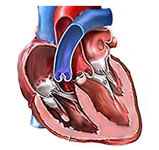

Preparing and Importing the tool for this machine learing project about Heat Disease data from **kaggle**

In [1]:
#importing the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

#importing models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing Model Evaluation Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load **Data**

In [2]:
df = pd.read_csv("/content/drive/My Drive/data_files/heart.csv")
df.shape

(303, 14)

##EDA || Exploratory Data Analysis

Check List for EDA
1. What questions are we trying to solve?
2. What kind of data do we have and how we treat different types?
3. What are the missing values from the data and how do we deal with it?
4. What are the outliers and why whould you care about them?
5. How can we add, change or remove features to get more out of our data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

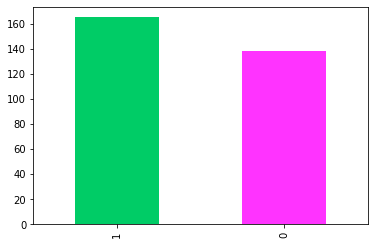

In [6]:
df.target.value_counts().plot(kind="bar", color = ['#00CC66','#FF33FF' ]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


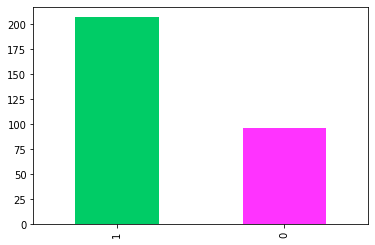

In [9]:
df.sex.value_counts().plot(kind="bar", color = ['#00CC66','#FF33FF' ]); # male (1) to female (0) ratio

In [10]:
#check sex to heart disease ration
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


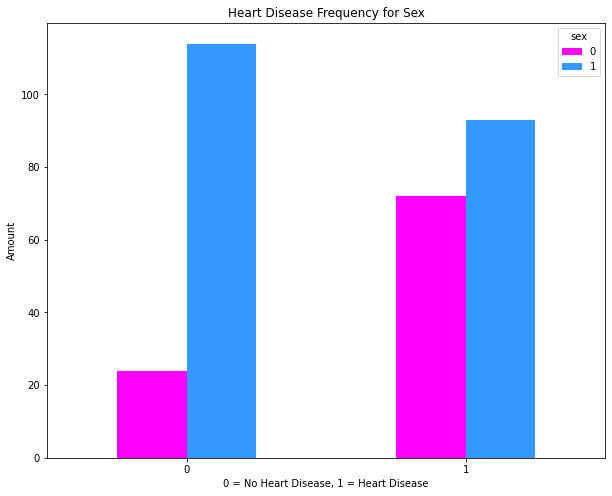

In [11]:
pd.crosstab( df.target, df.sex).plot(
                                    kind="bar",
                                    figsize = (10,8),
                                    color=['#FF00FF', '#3399FF'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
#plt.legend(female, male)
plt.xticks(rotation=0);

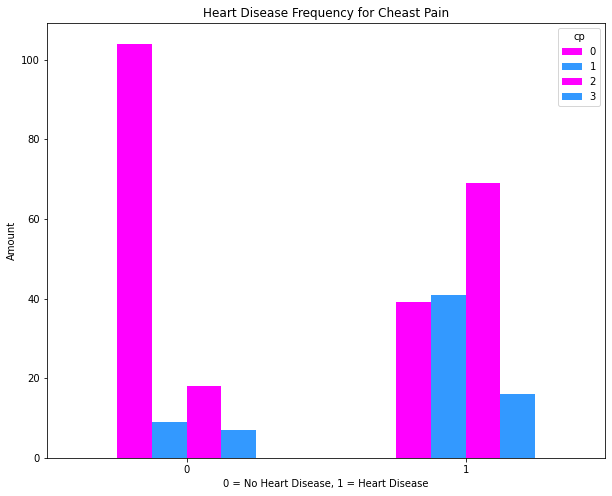

In [12]:
pd.crosstab( df.target, df.cp).plot(
                                    kind="bar",
                                    figsize = (10,8),
                                    color=['#FF00FF', '#3399FF'])
plt.title("Heart Disease Frequency for Cheast Pain")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Age vs Heart Rate in Heart Disease Trends


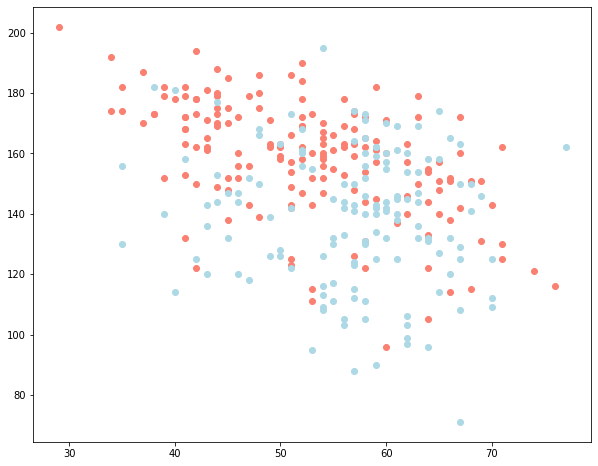

In [14]:
#Creating a scatter Plot
plt.figure(figsize=(10,8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue");
          
#Add Legends & Title
#plt.title("Age & Heart Rate in Function of Heart Disease")
#plt.xlabel("Age")
#plt.ylabel("Heart rate")
#plt.legend(["Heart Disease", "No Heart Disease"]);

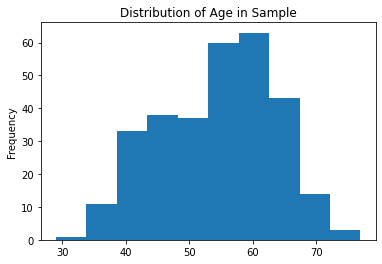

In [15]:
#Distribution of Age
df.age.plot.hist(title="Distribution of Age in Sample")



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

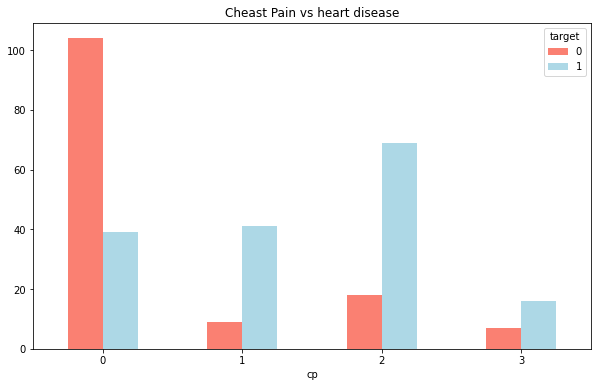

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"],
                                   title="Cheast Pain vs heart disease",
                                   )
#plt.title("Cheast Pain vs heart disease")
plt.xticks(rotation=0)

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


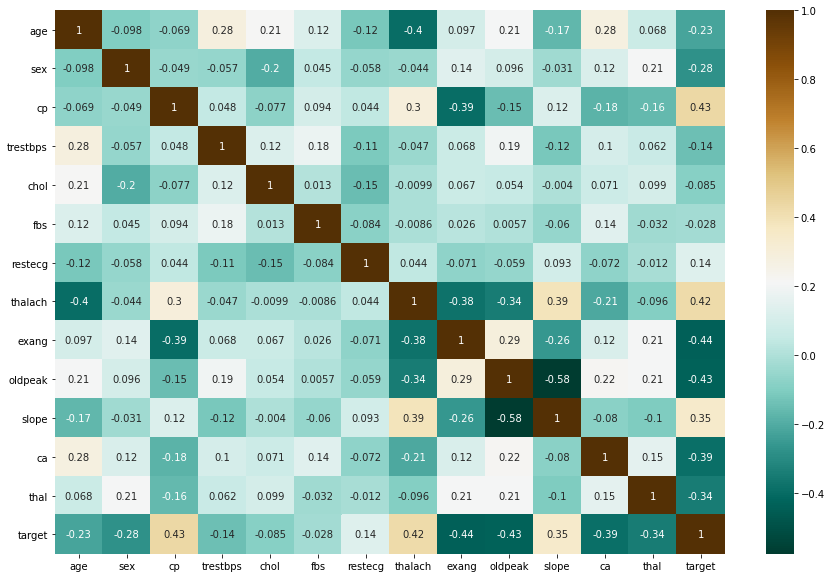

In [18]:
coor_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(coor_matrix, annot=True, linewidths=0, cbar=True, xticklabels='auto', yticklabels='auto',fmt='.2g', cmap="BrBG_r" );


**Modelling**

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#Splitting Data in to X & y

X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [0]:
#Splitting Data in to Test & Trai Sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now we will build ML Models
Idea is use following algorithems:
- Logistic Regression
- K-Nearest Neibiughers Classifier
- Random Forest Classifier

In [0]:
#Putting Models in to a dictionary

models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  #setup random seed
  np.random.seed(42)
  #make a dictionary to keep the model score
  model_scores = {}
  #Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    #Evaluate the model and aped its score to model_scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores


In [27]:
model_scores = fit_and_score(models=models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
#model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

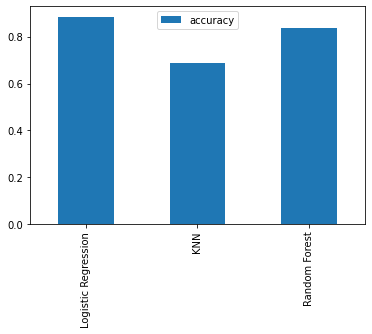

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got the baseline model, we need to improve our models

Ket's look at the following:
* Hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)


Hyperparameter Tuning
**KNN**

In [0]:
train_scores = []
test_scores = []

#create a ist of different values for kneighbors
neighbors = range (1,21)

#Set KNN instances
knn = KNeighborsClassifier()

#loop though different neighbores
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #fit the algorithm
  knn.fit(X_train, y_train)

  # Update the training Scores
  train_scores.append(knn.score(X_train, y_train))

  # Update the test Scores
  test_scores.append(knn.score(X_test, y_test))

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum Score on test data: 75.409836%


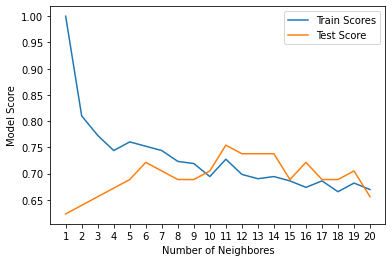

In [32]:
plt.plot(neighbors, train_scores,label = "Train Scores" )
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of Neighbores")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Maximum Score on test data: {max(test_scores)*100:2f}%")

Let's Drop KNN since its lowest @75.40% accuracy score even after tuning

now we try **Hyperparameters** by Cross Validation for rest of tow models

* Logistics Regresstion
* Random Forest Calssifier

using **RandomizedSearchCV (Cross Validation)**

In [0]:
# Creating Hyperparametr grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#Create Hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50), 
           "max_depth":[None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange (1,20,2)}


Now we have got Hyperpameter grid setup for each of our models, we need to tune them using Randomized Search CV

In [34]:
np.random.seed(42)

#Setup random hyperparamert search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

#Fit Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [35]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We did not see any improvement in Logistic Regression after the Tuning;
Now we need to tune Random Forest Classifies

In [37]:
np.random.seed(42)

#setting Hyperparameters for Random Forest Classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)

#Fiting Randomizsed search CV to Random Forest Classifier
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [39]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [40]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

There is an improvement in Random Forest Classifier score after the Hyperparamert tuning of Randomized Search CV from **83.60%** to **86.88%**


**Hyperparameters using GridSearchCV**

Since LogisticRegression model had the highest score sofar 88.52%, we will try and improve the score by using GridSearch CV

In [41]:
#Different Hyperparemerts for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

#setup grid for Hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          verbose=True,
                          cv=5)
#fit Grid for Hyperparametersearch
gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [42]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

There is no improvement from earlier model score of Logistics Regression Model


**Evaluating our Tuned Machine Learing Model, beyond Accuracy**
- ROC Curve and AUC Score
- Confusion Matrix
- Classificaion report
- Precision
- Recall
- F1-score

... and it would be great if Cross-validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predictions

In [0]:
#make predictions with Tunes Model
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

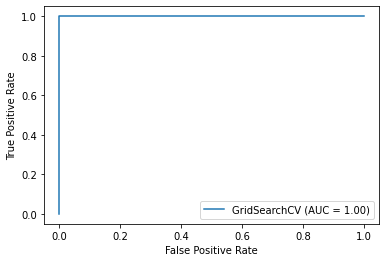

In [50]:
##Let's plot the ROC Curve and AUC metric

plot_roc_curve(gs_log_reg, X_test, y_preds)

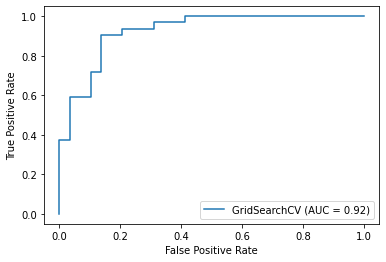

In [52]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [55]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Text(-4.5, 0.5, 'Predicted Label')

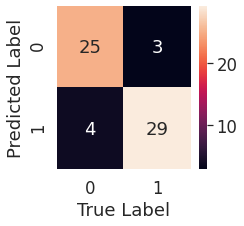

In [64]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_preds, y_test):
  """
  Plots nice looking confusion matrix using seaborn heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                   annot = True,
                   cbar = True)
plot_conf_mat(y_preds, y_test)

plt.xlabel("True Label")
plt.ylabel("Predicted Label")

**Now we have got ROC Curve, an AUC Matrics and a confusion matrix, lets get a classification report as well as cross-validation precision, recall and f-1 score**

In [66]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculate evaluation metrics using cross-validation**

In [67]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [0]:
#create new parameters with best parameters
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [71]:
# Cross Validation Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [73]:
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.8479781420765027

In [74]:
# Cross Validation Precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [76]:
cv_pre_mean = np.mean(cv_pre)
cv_pre_mean

0.8215873015873015

In [77]:
# Cross Validation Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [79]:
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9272727272727274

In [81]:
# Cross Validation f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8705403543192143

Visulizing of Cross Validted Matrics


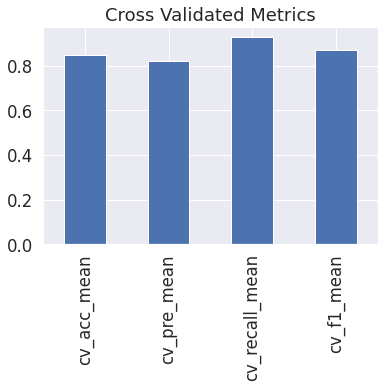

In [86]:
cv_matric = pd.DataFrame({"cv_acc_mean": cv_acc_mean,
                         "cv_pre_mean": cv_pre_mean,
                          "cv_recall_mean": cv_recall_mean,
                          "cv_f1_mean": cv_f1_mean},
                         index=[0])
cv_matric.T.plot.bar(title = "Cross Validated Metrics", legend = False);

Finding Feature Importance in the Machine Learning LogisticRegression Model

In [88]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [92]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220776580221,
 'ca': -0.6516534770577476,
 'chol': -0.0017036439067759743,
 'cp': 0.6747282587404362,
 'exang': -0.6312040612837573,
 'fbs': 0.047876881148997324,
 'oldpeak': -0.5759095045469952,
 'restecg': 0.3349019815885189,
 'sex': -0.9042409028785717,
 'slope': 0.4709514073081419,
 'thal': -0.6998420764664995,
 'thalach': 0.02472938284108309,
 'trestbps': -0.011613401339975146}

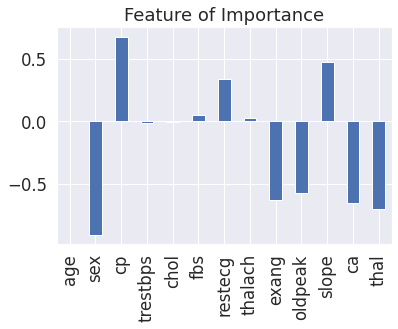

In [93]:
#Visualization of Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature of Importance", legend=False)

In [94]:
from sklearn.externals import joblib

joblib.dump(gs_log_reg, 'gs_log_reg.joblib')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['gs_log_reg.joblib']